ASSIGNMENT 3

Date: 09 October 2022

Team ID: PNT2022TMID38414

Project Name : Intelligent Vehicle Damage Assessment & Cost Estimator for Insurance Companies

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
batch_size = 16

#1. Unzip File

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

#2. IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

> spliting dataset into training and test

In [ ]:
train_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [ ]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="validation",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [ ]:
class_names = train_data_set.class_names

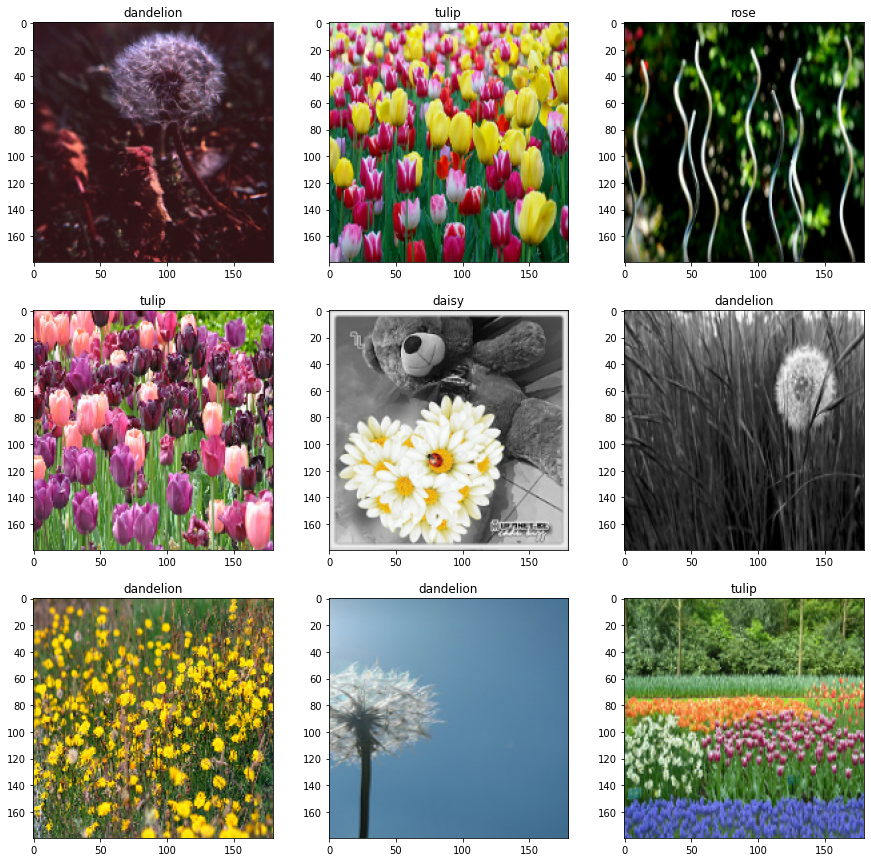

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_data_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
dataset_normalized = train_data_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


#3. Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

#4. Add Layers

In [ ]:
model = Sequential()#Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

#5. Compile Model

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


#6.  Fit The Model

In [ ]:
#Train Model
model.fit(xtrain,
          steps_per_epoch=len(xtrain),
          epochs=10,
          )

Epoch 1/10
44/44 [==============================] - 15s 299ms/step - loss: 1.4841 - accuracy: 0.3975
Epoch 2/10
44/44 [==============================] - 13s 299ms/step - loss: 1.1076 - accuracy: 0.5610
Epoch 3/10
44/44 [==============================] - 13s 305ms/step - loss: 1.0257 - accuracy: 0.5916
Epoch 4/10
44/44 [==============================] - 13s 308ms/step - loss: 0.9572 - accuracy: 0.6206
Epoch 5/10
44/44 [==============================] - 13s 306ms/step - loss: 0.8818 - accuracy: 0.6637
Epoch 6/10
44/44 [==============================] - 13s 302ms/step - loss: 0.8617 - accuracy: 0.6718
Epoch 7/10
44/44 [==============================] - 13s 302ms/step - loss: 0.8029 - accuracy: 0.6956
Epoch 8/10
44/44 [==============================] - 13s 306ms/step - loss: 0.7843 - accuracy: 0.6977
Epoch 9/10
44/44 [==============================] - 13s 301ms/step - loss: 0.7593 - accuracy: 0.7102
Epoch 10/10
44/44 [==============================] - 13s 306ms/step - loss: 0.7113 - accura

#7. Save Model

In [ ]:
#Model save h5 formet
model.save('flowers.h5')

#8. Testing Model

## Test : Daisy

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

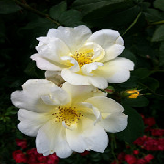

In [ ]:
img = image.load_img('/content/flowers/rose/10090824183_d02c613f10_m.jpg',target_size=(164,164))
img

In [ ]:
x = image.img_to_array(img)
x
x = np.expand_dims(x,axis=0)
x
model.predict(x)

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'daisy'

##Test : Rose

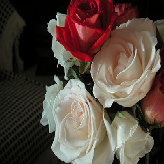

In [ ]:
from numpy.lib.type_check import imag
img = image.load_img('/content/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(164,164))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'rose'

## Test : Sunflower

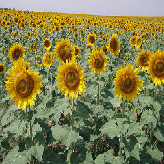

In [ ]:
from numpy.lib.type_check import imag
img = image.load_img('/content/flowers/sunflower/1022552036_67d33d5bd8_n.jpg',target_size=(164,164))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

## Test : Tulip

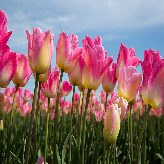

In [ ]:
from numpy.lib.type_check import imag
img = image.load_img('/content/flowers/tulip/10128546863_8de70c610d.jpg',target_size=(164,164))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'tulip'

## Test : Dandelion

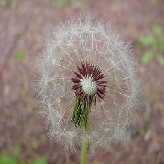

In [ ]:
from numpy.lib.type_check import imag
img = image.load_img('/content/flowers/dandelion/11405573_24a8a838cc_n.jpg',target_size=(164,164))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'